# Kernel PCA

## Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

## Importing the Dataset

In [2]:
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the Dataset into the Training Set and Test Set

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [4]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Applying Kernel PCA

Kernel Principal Component Analysis (Kernel PCA) is a technique used to perform non-linear dimensionality reduction.

It is used to simplify data, make it easier to visualize, and improve the efficiency of machine learning algorithms, especially when the data is not linearly separable.

Kernel PCA works by mapping the data into a higher-dimensional space where linear separation is possible and then performing standard PCA.

#### Steps:
1. **Compute the Kernel Matrix**: Use a kernel function $k(x_i, x_j)$ to compute the kernel (similarity) matrix $K$.
   $$ K_{ij} = k(x_i, x_j) $$

2. **Center the Kernel Matrix**:
   $$ \tilde{K} = K - \mathbf{1}_N K - K \mathbf{1}_N + \mathbf{1}_N K \mathbf{1}_N $$
   Where $\mathbf{1}_N$ is an $N \times N$ matrix with all elements equal to $\frac{1}{N}$.

3. **Compute Eigenvalues and Eigenvectors**: Solve the eigenvalue problem for the centered kernel matrix $\tilde{K}$.
   $$ \tilde{K} \mathbf{v} = \lambda \mathbf{v} $$

4. **Sort and Select Principal Components**: Order the eigenvectors by their corresponding eigenvalues in descending order. Select the top $k$ eigenvectors.

5. **Transform the Data**: Project the data onto the selected principal components.
   $$ Z = \tilde{K} \cdot \mathbf{V} $$
   Where $Z$ is the transformed data, $\tilde{K}$ is the centered kernel matrix, and $\mathbf{V}$ is the matrix of selected eigenvectors.

Kernel PCA effectively reduces the number of features while capturing the non-linear relationships in the data.

In [5]:
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

## Training the Logistic Regression Model on the Training Set

In [6]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Making the Confusion Matrix

In [7]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

In [8]:
print(cm)

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


In [9]:
accuracy_score(y_test, y_pred)

1.0

## Visualising the Training Set Results

/tmp/ipykernel_43967/1815430569.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


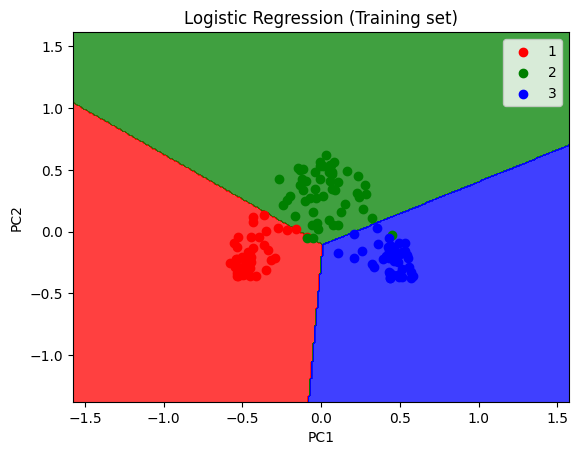

In [10]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Visualising the Test Set Results

/tmp/ipykernel_43967/2974433690.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


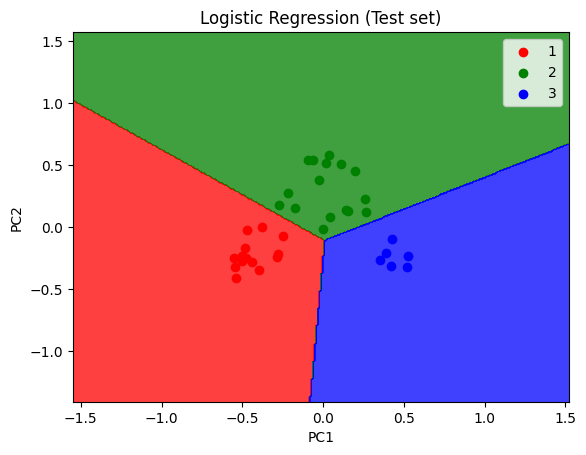

In [11]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()